In [2]:
# importing libraries
import pandas as pd 

In [3]:
#importing data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2/29/2016 16:40,2/29/2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,3/11/2016 23:35,3/11/2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2/21/2016 17:59,2/21/2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,1/5/2016 9:44,1/5/2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2/17/2016 6:42,2/17/2016 6:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
data.shape

(729322, 11)

In [8]:
#printing all the cloumns present indata
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
#datatypes of all the columns
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2/29/2016 16:40,2/29/2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,3/11/2016 23:35,3/11/2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2/21/2016 17:59,2/21/2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,1/5/2016 9:44,1/5/2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2/17/2016 6:42,2/17/2016 6:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [11]:
#null values in dataset
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712235,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [15]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [16]:
#creating new features from datetime features
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff-day']=data['dropoff_datetime'].dt.day_name()

In [17]:
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

In [18]:
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

In [19]:
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [20]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [26]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [78]:
pip install geopy

     -------------------------------------- 119.8/119.8 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 40.3/40.3 kB 640.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
from geopy.distance import great_circle

In [83]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [80]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [81]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff-day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,0,0,16,16,2,2,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:00,2016-03-11 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,4,4,23,23,3,3,Late night,Late night,4.129117
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,6,6,17,18,2,2,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:00,2016-01-05 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,1,1,9,10,1,1,Morning,Morning,2.361100
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,2,2,6,6,2,2,Morning,Morning,4.328540


In [91]:
#data visualisation
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

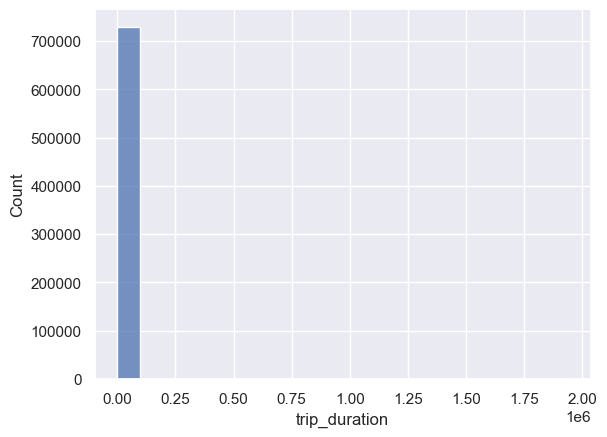

In [92]:
sns.histplot(data['trip_duration'],kde=False,bins=20)

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

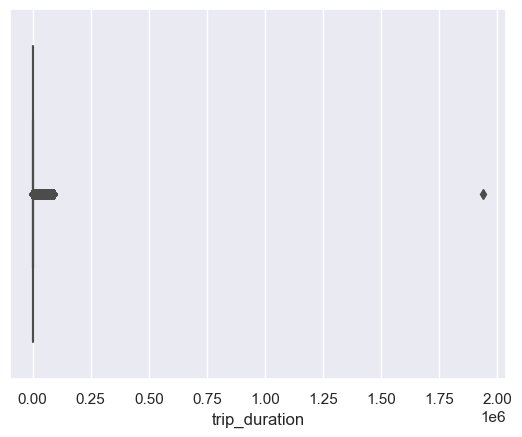

In [94]:
sns.boxplot(data['trip_duration'])

In [95]:
data['trip_duration'].sort_values(ascending=False)


21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [96]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

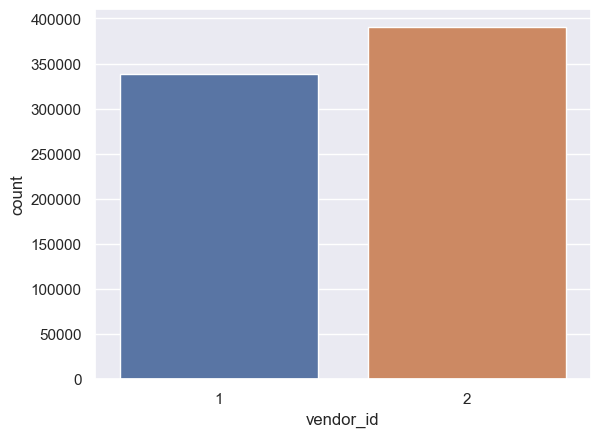

In [97]:
sns.countplot(x='vendor_id',data=data)

In [98]:
#passenger count
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

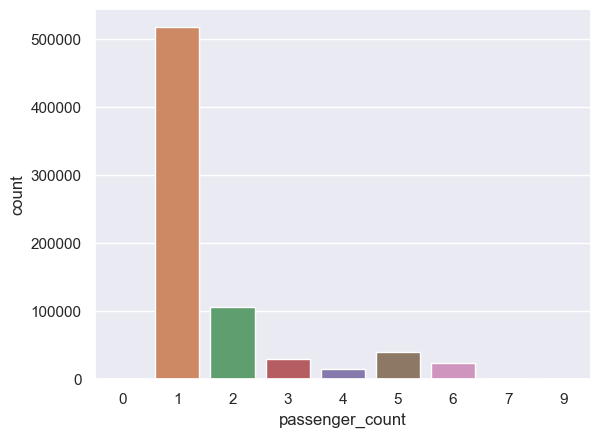

In [99]:
sns.countplot(x='passenger_count',data=data)

In [100]:
#removing row with 0,7,9 passenger count
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [101]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [102]:
#store and forward flag
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

In [103]:
data['distance'].value_counts()

0.000000     2893
0.000425       16
0.000848       15
0.000424       13
0.001272       13
             ... 
1.107790        1
2.688127        1
2.457477        1
10.326845       1
5.945845        1
Name: distance, Length: 726233, dtype: int64

In [ ]:
#there are 2893 trips with 0 km distance.
The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked.
The driver deliberately took this ride to complete a target ride number.
The passengers canceled the trip.
We will analyze these trips further in bivariate analysis.

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

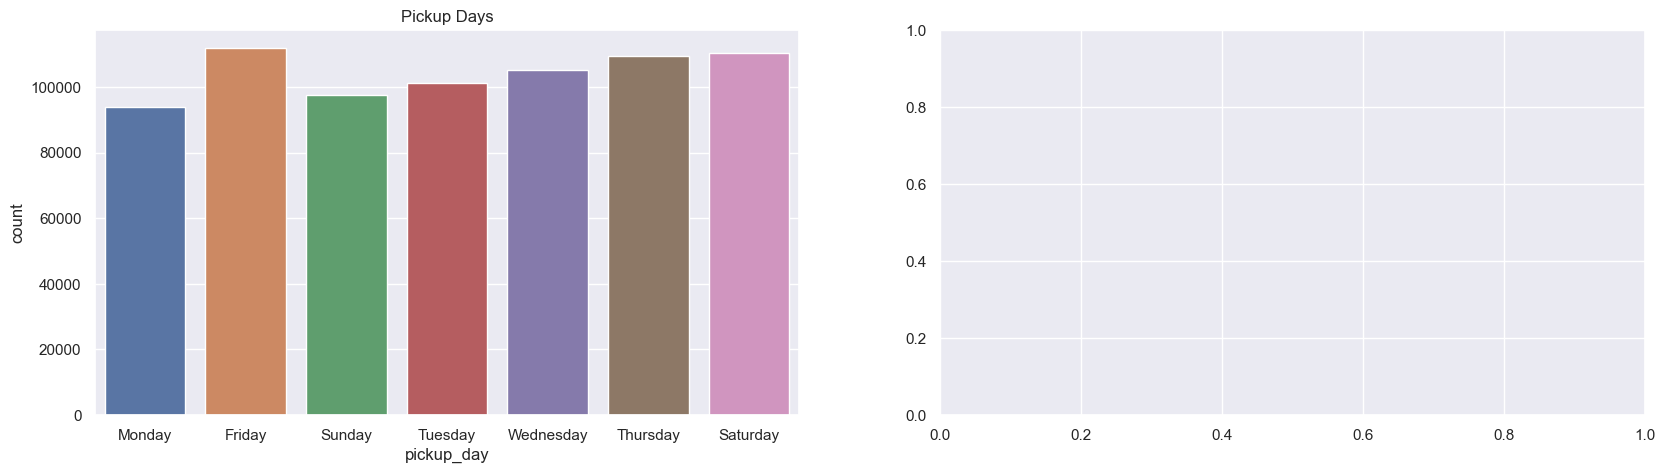

In [126]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)

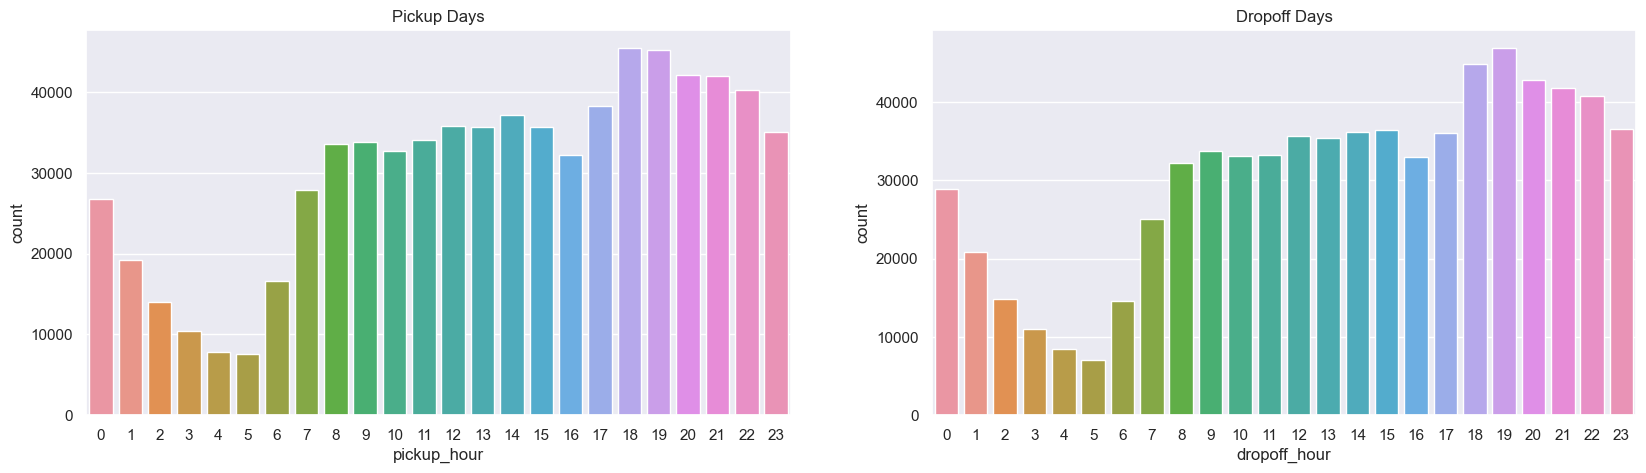

In [127]:
#trip per hour
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

In [128]:
#busiest hours are 6:00 pm to 7:00 pm 

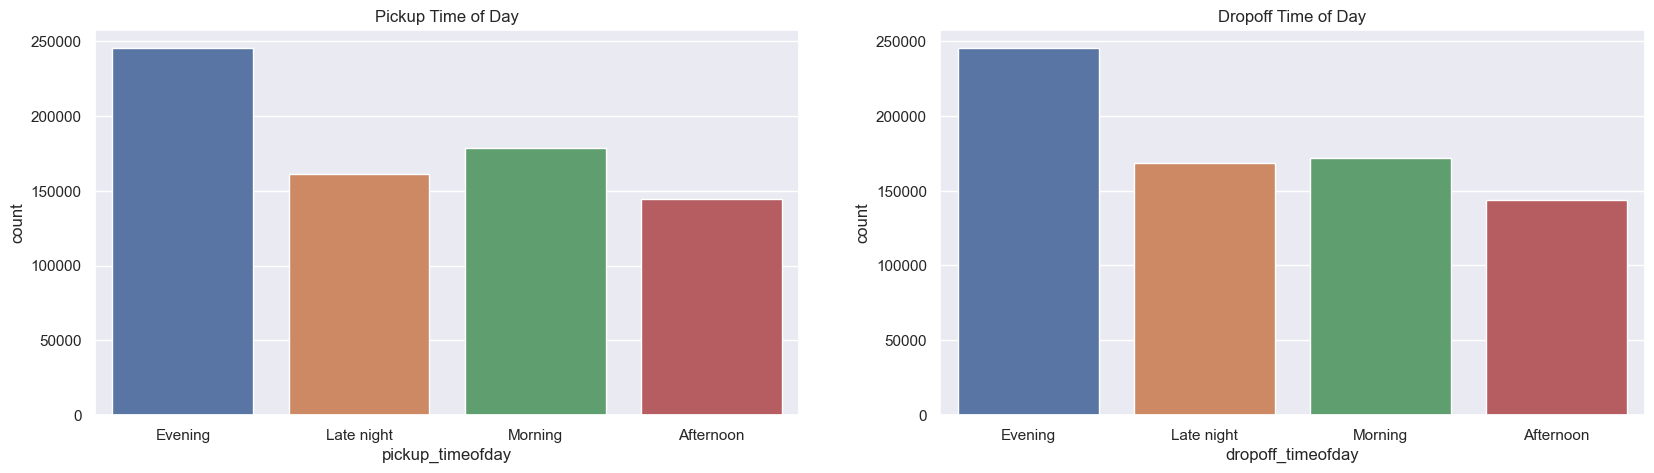

In [129]:
#trips per Time of Day
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

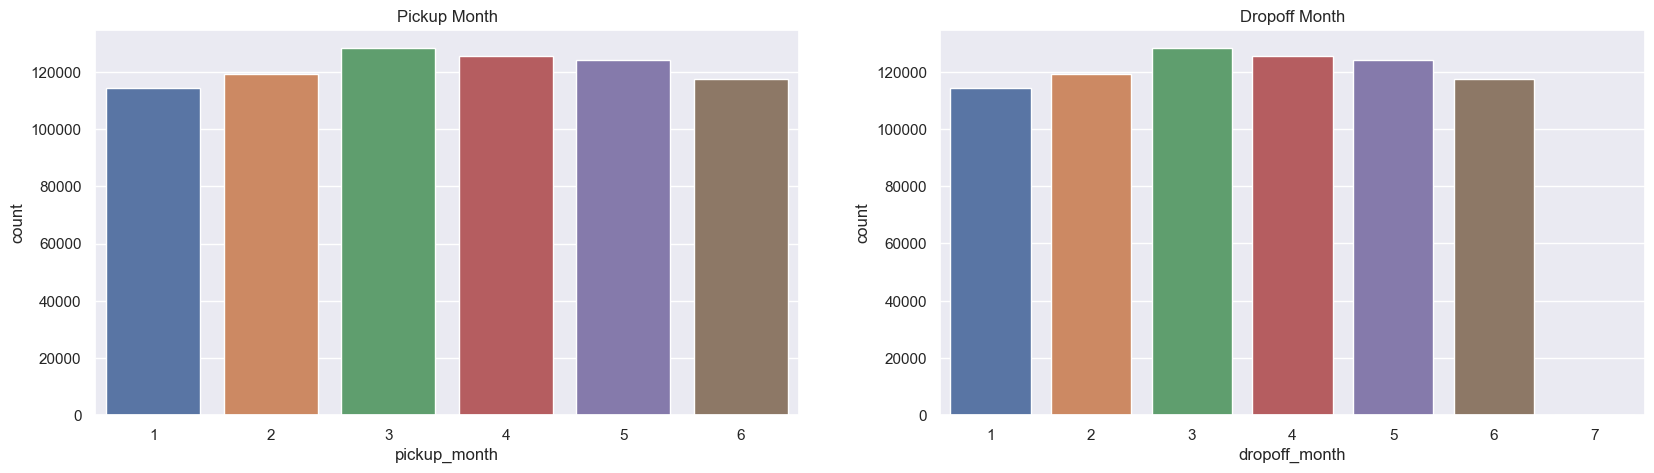

In [131]:
#trip per month
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

In [134]:
import datetime as dt

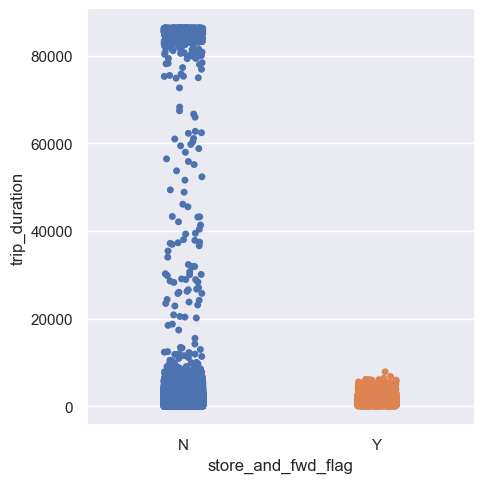

In [137]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data,kind="strip")

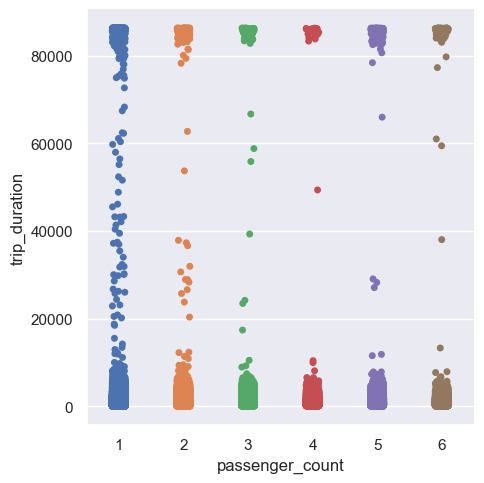

In [138]:
#trip duration per passenger count
sns.catplot(y='trip_duration',x='passenger_count',data=data,kind="strip")

<AxesSubplot:xlabel='pickup_timeofday', ylabel='trip_duration'>

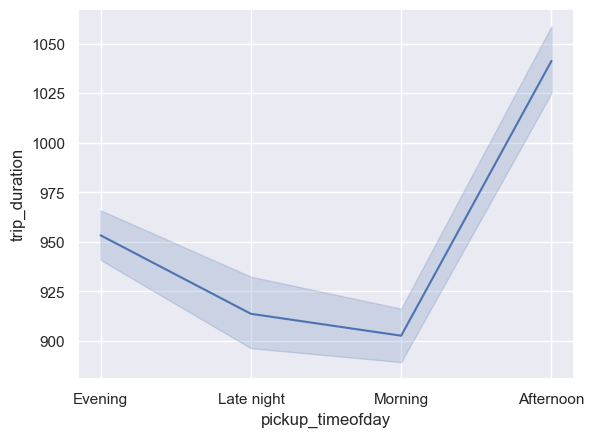

In [141]:
#trip Duration per time of day
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

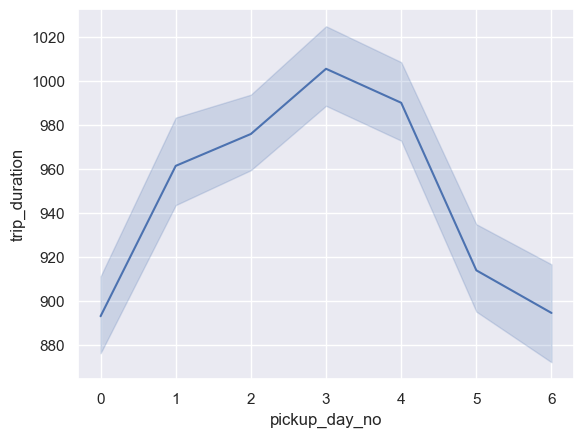

In [142]:
#trip duration per day of week
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)

<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

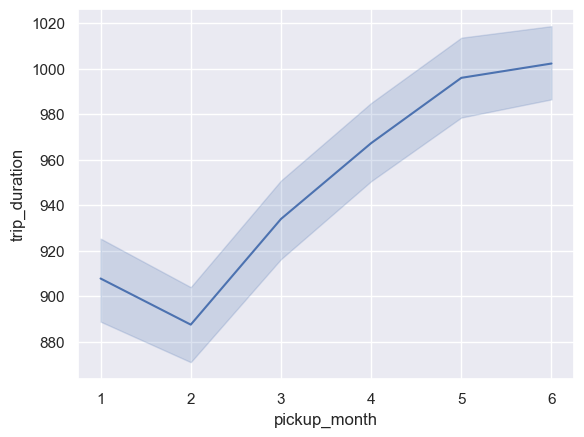

In [143]:
#trip Duration per month
sns.lineplot(x='pickup_month',y='trip_duration',data=data)

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

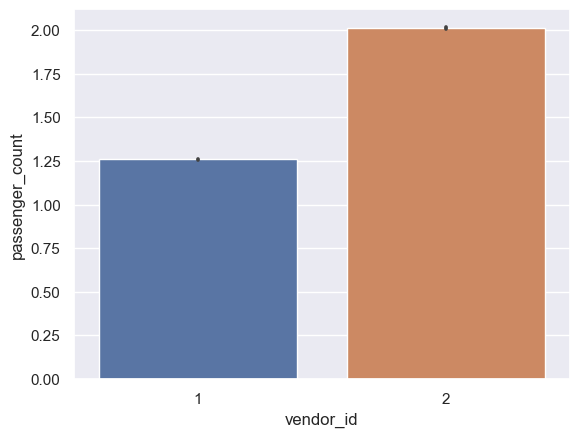

In [153]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)

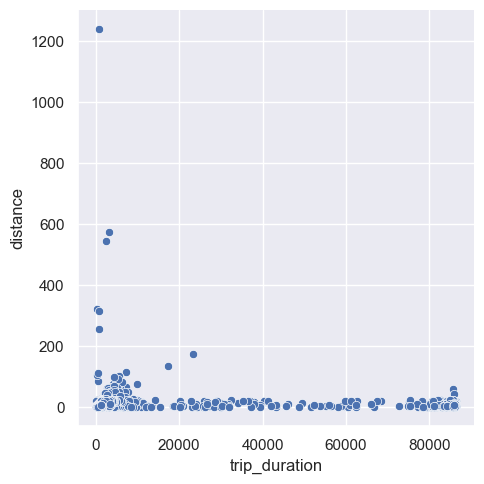

In [154]:
sns.relplot(y=data.distance,x='trip_duration',data=data)

In [155]:
data[data.distance==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff-day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,...,Tuesday,1,1,11,11,6,6,Morning,Morning,0.0
327,id0786923,2,2016-03-26 13:34:00,2016-03-26 13:37:00,1,-73.996323,40.753460,-73.996323,40.753460,N,...,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,0.0
795,id2323213,2,2016-06-13 16:49:00,2016-06-13 17:04:00,5,-73.967171,40.763500,-73.967171,40.763500,N,...,Monday,0,0,16,17,6,6,Evening,Evening,0.0
1176,id3235868,1,2016-02-29 21:39:00,2016-02-29 21:44:00,1,-73.995232,40.744038,-73.995232,40.744038,N,...,Monday,0,0,21,21,2,2,Evening,Evening,0.0
1257,id1865738,2,2016-03-13 11:38:00,2016-03-13 12:00:00,2,-73.912781,40.804428,-73.912781,40.804428,N,...,Sunday,6,6,11,12,3,3,Morning,Afternoon,0.0


In [156]:
data[data.distance==0].tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff-day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
728720,id3423342,2,2016-05-05 21:32:00,2016-05-05 21:32:00,2,-73.977898,40.766392,-73.977898,40.766392,N,...,Thursday,3,3,21,21,5,5,Evening,Evening,0.0
728775,id2618105,2,2016-03-13 20:06:00,2016-03-13 20:14:00,1,-73.974258,40.759895,-73.974258,40.759895,N,...,Sunday,6,6,20,20,3,3,Evening,Evening,0.0
728838,id1232120,2,2016-05-29 04:04:00,2016-05-29 04:11:00,2,-73.984558,40.750839,-73.984558,40.750839,N,...,Sunday,6,6,4,4,5,5,Late night,Late night,0.0
729025,id3524028,2,2016-04-06 18:03:00,2016-04-06 18:26:00,1,-74.083611,40.632401,-74.083611,40.632401,N,...,Wednesday,2,2,18,18,4,4,Evening,Evening,0.0
729308,id3477255,2,2016-01-20 08:22:00,2016-01-20 08:47:00,1,-73.977859,40.749538,-73.977859,40.749538,N,...,Wednesday,2,2,8,8,1,1,Morning,Morning,0.0


In [ ]:
#distance is recorded as 0 but trip duration is definitely more
reason -short trip duratio  or cancelled the ride after some time